# Fake News detection | Kaggle

## Setup and import libraries

In [1]:
# Automatically reloading imported modules
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import *

pd.set_option('display.max_columns', None)

In [3]:
# Change design of plots
sns.set(style="whitegrid")

# Change sizes and resolution of plots
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [4]:
df = pd.read_csv('data/data.csv')

## General descriptive analysis

Let's check shape of the data - number of rows and attributes:

In [5]:
df.shape

(4009, 4)

Overview of the data:

In [6]:
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


### Datatypes

**Note:** Be careful, attributes with only NaN values are considered as `float64` type by default.

In [7]:
df.dtypes

URLs        object
Headline    object
Body        object
Label        int64
dtype: object

### Basic characteristics

In [8]:
df.describe()

,Label
count,4009.000000
mean,0.466949
std,0.498969
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [9]:
df.describe(exclude=[np.number])

,URLs,Headline,Body
count,4009,4009,3988
unique,3254,2831,2863
top,http://beforeitsnews.com/u-s-politics/2017/10/...,"9/28 From the 50s Forward: '52 Woes, Freak SHo...",A Potato Battery Can Light up a Room for Over ...
freq,5,6,143


### One-value columns

Which attributes contain only one value?

In [10]:
one_value_attributes_analysis(df)

### Missing values

Analysis of missing values in attributes:

Body: 21 (0.52%)

Missing values plot (inverse logic, plot is showing how many values are not NaN):


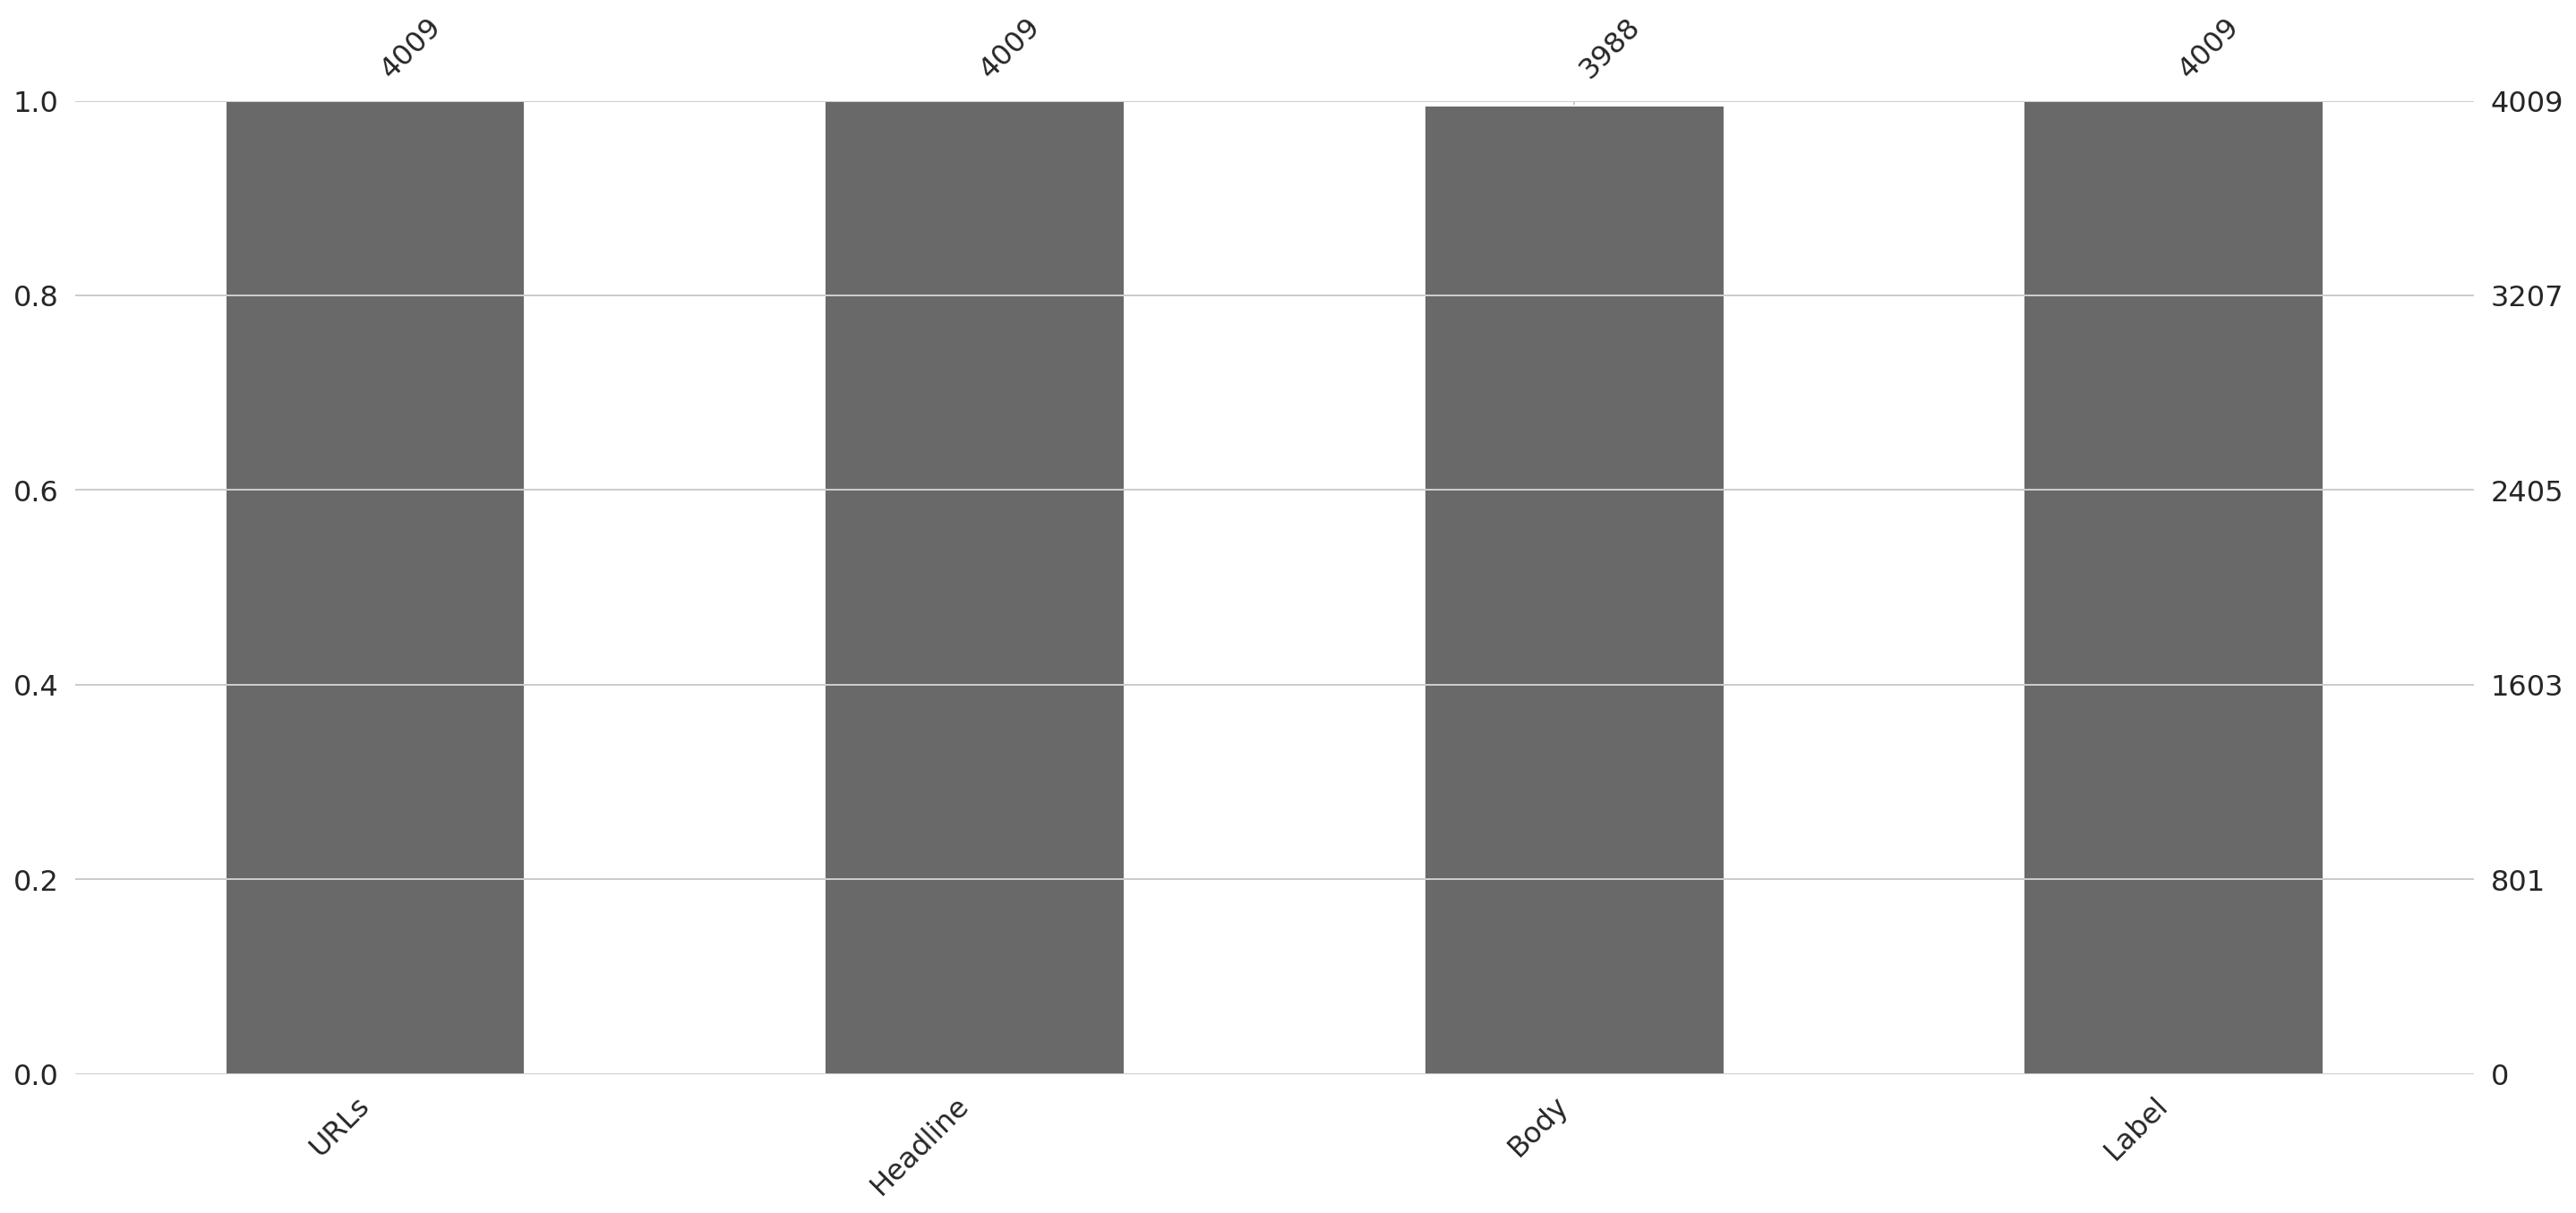

In [11]:
missing_values_analysis(df)

### Duplicates

Are there any duplicates?

In [12]:
df.duplicated().any()

True

## Attributes analysis

Analysis of all attributes:

In [13]:
skip_attributes = [
] # attributes to skip in analysis (e.g. id)

textual_attributes = [
    'Body', 'Headline', 'URLs'
] # attributes with text values (e.g. content of article)
textual_attributes = list(filter(lambda value: value not in skip_attributes, textual_attributes))

numerical_attributes = list(df.select_dtypes([np.number]).columns)
numerical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, numerical_attributes))

categorical_attributes = list(df.select_dtypes(['object', 'category', 'bool']).columns)
categorical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, categorical_attributes))

label_column = 'Label' # attribute considered as "label"

### Label attribute distribution

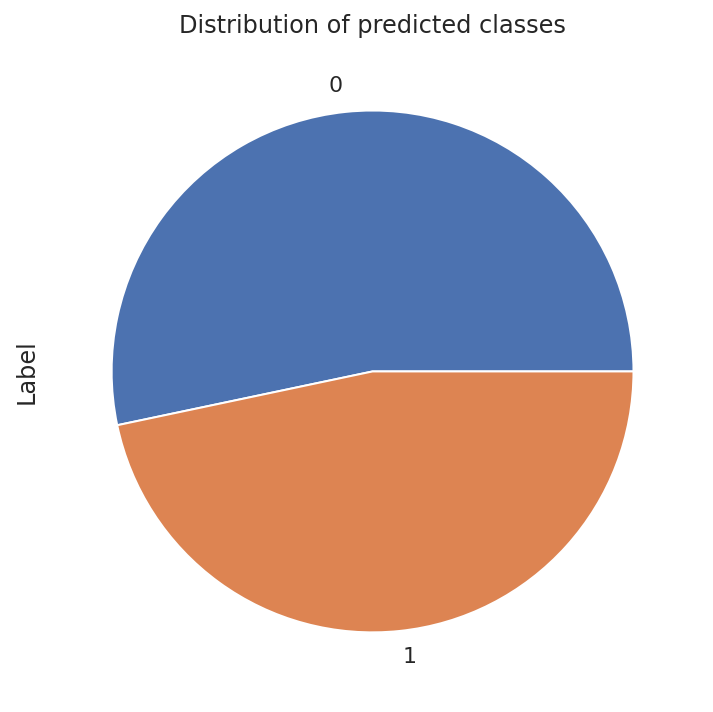

In [14]:
df[label_column].value_counts().plot(kind='pie', title='Distribution of predicted classes');

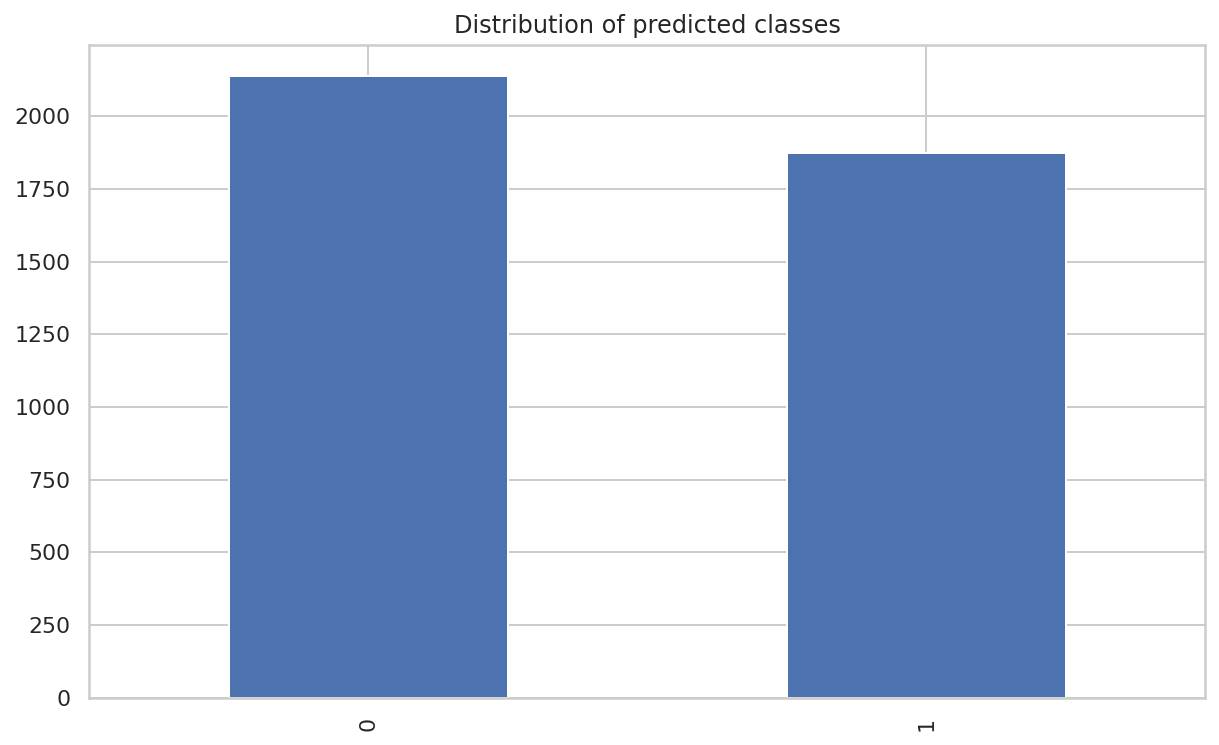

In [15]:
df[label_column].value_counts().plot(kind='bar', title='Distribution of predicted classes');

### Numerical attributes

Analysis of numerical attributes:

In [16]:
analyse_numerical_attributes(df, label_column, numerical_attributes)

There are no attributes to be analysed.


### Categorical attributes

Analysis of categorical attributes:

In [17]:
analyse_categorical_attributes(df, label_column, categorical_attributes)

There are no attributes to be analysed.


### Textual attributes

Some parts of analysis include preprocessing text. In this case, the following operations are performed:
* removing special characters (only letters are preserved),
* removing tokens shorter than 3 characters,
* removing tokens that are in english stop-words defined by NLTK library,
* removing accent marks from tokens.

Analysis of textual attributes:



Analysis of attribute "Body"


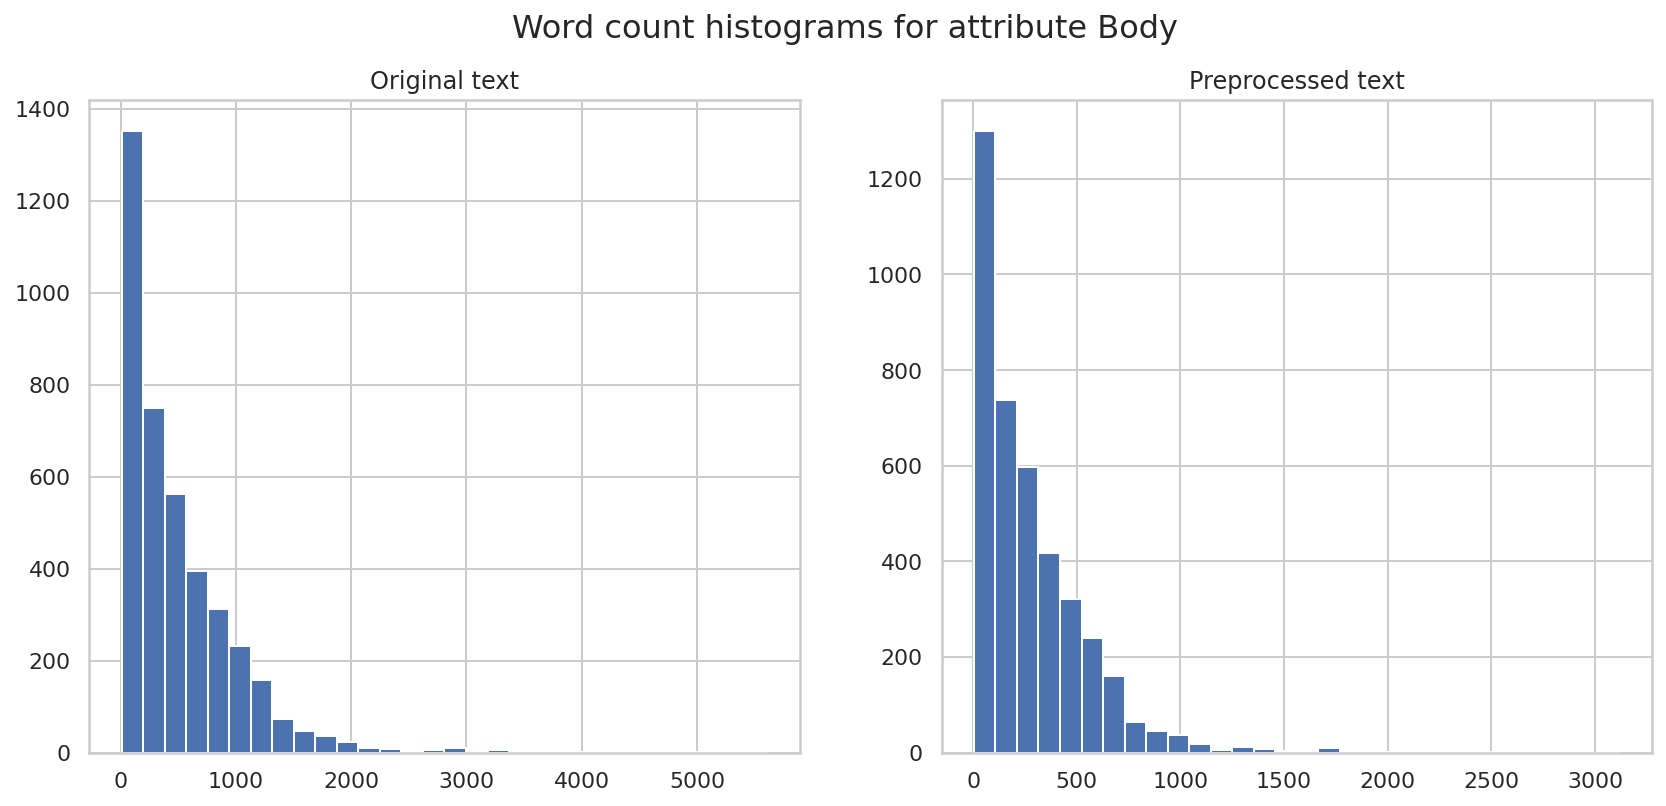

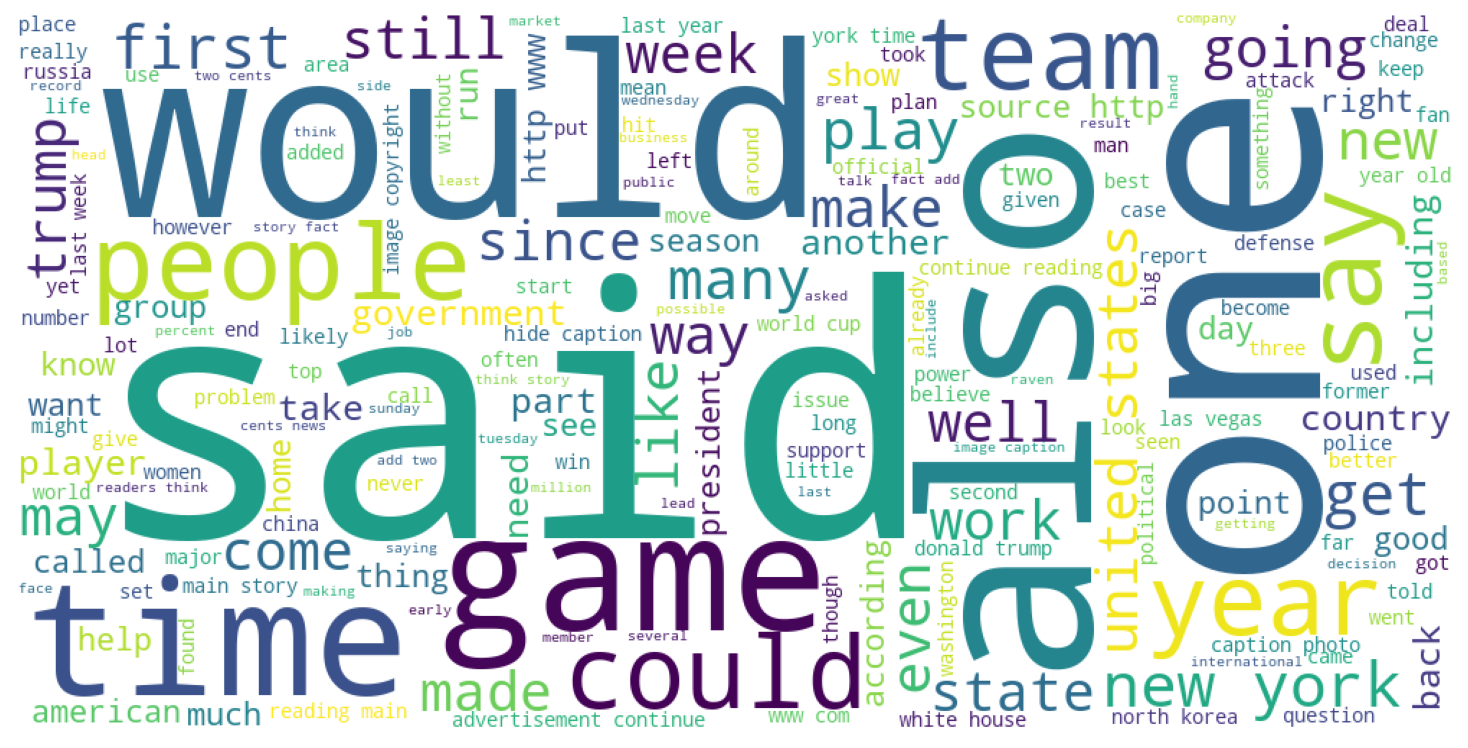



Analysis of attribute "Headline"


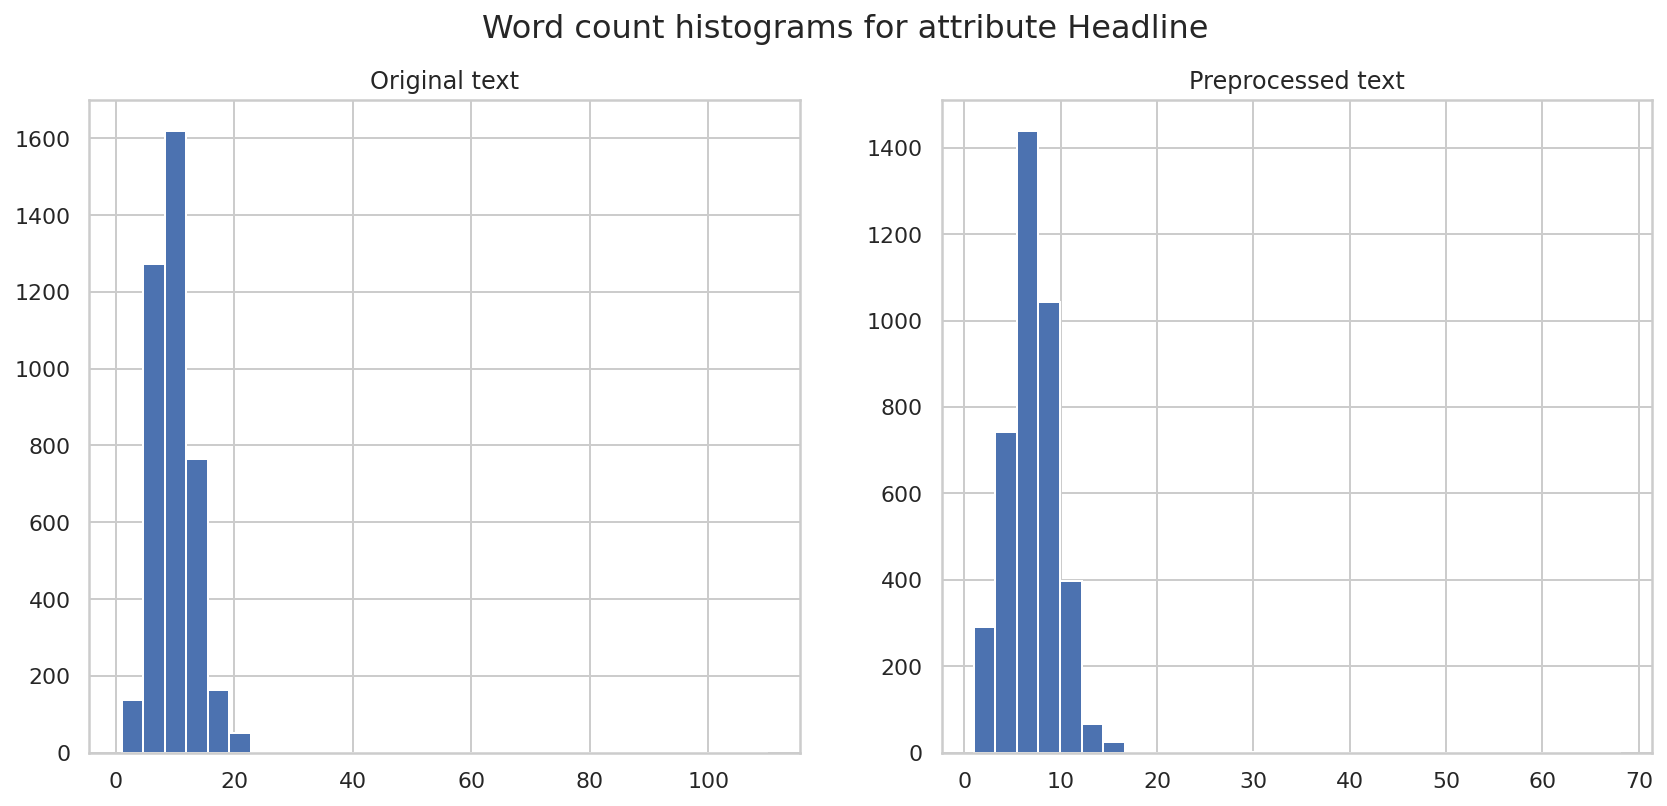

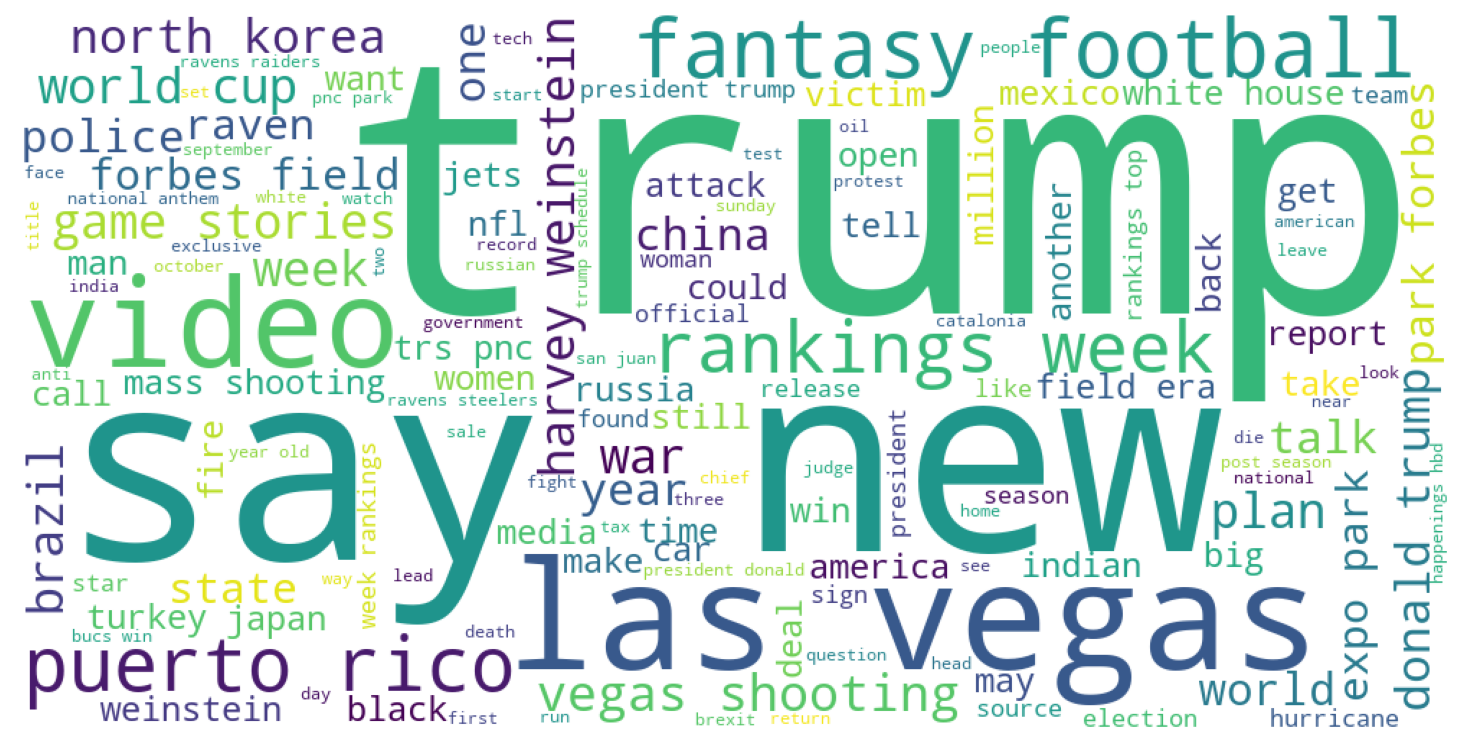



Analysis of attribute "URLs"


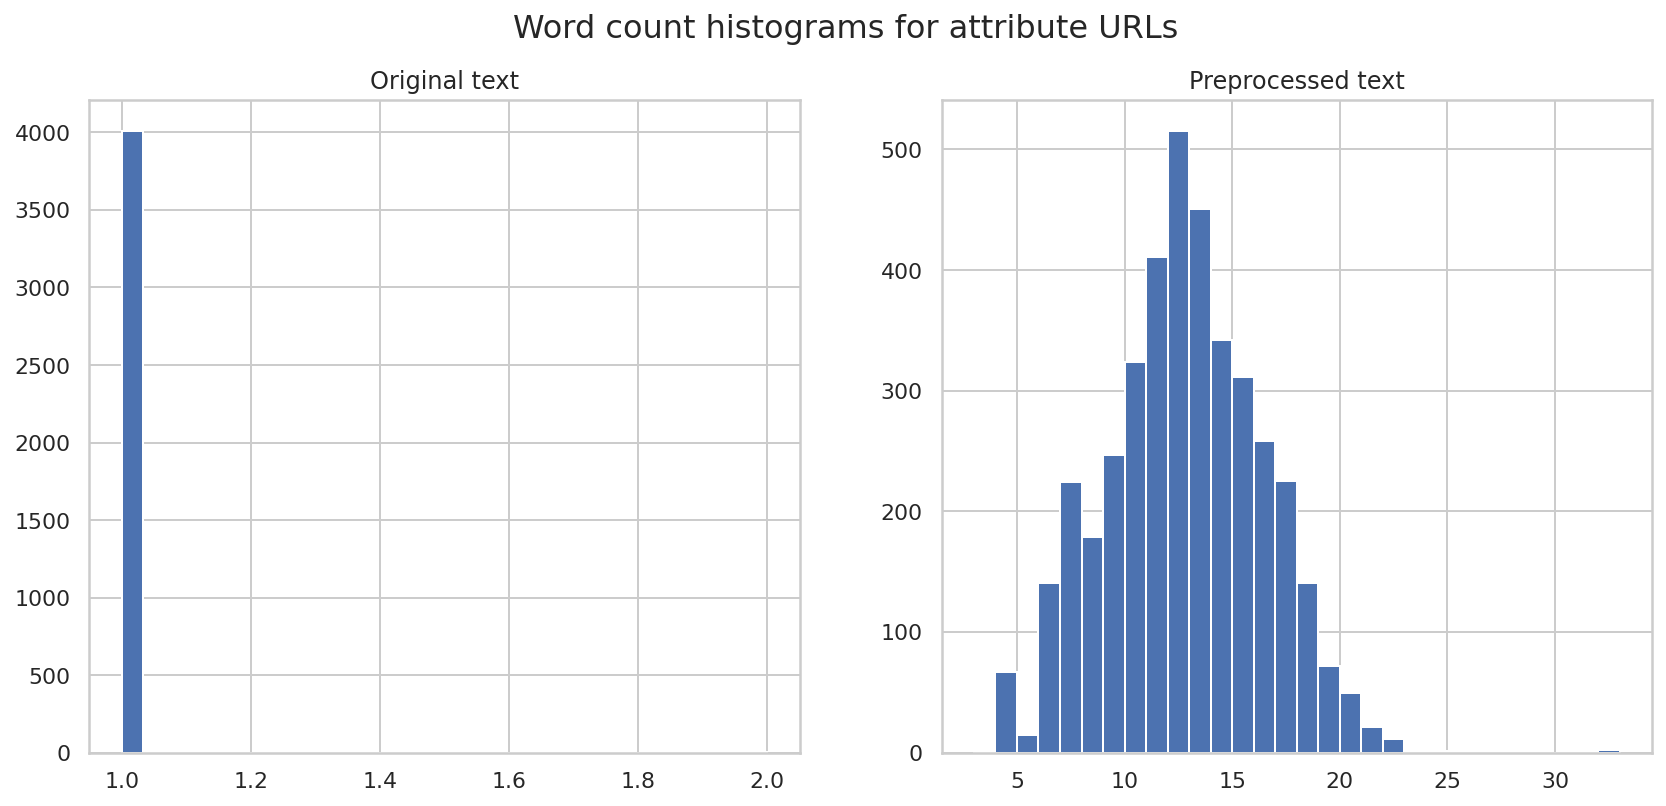

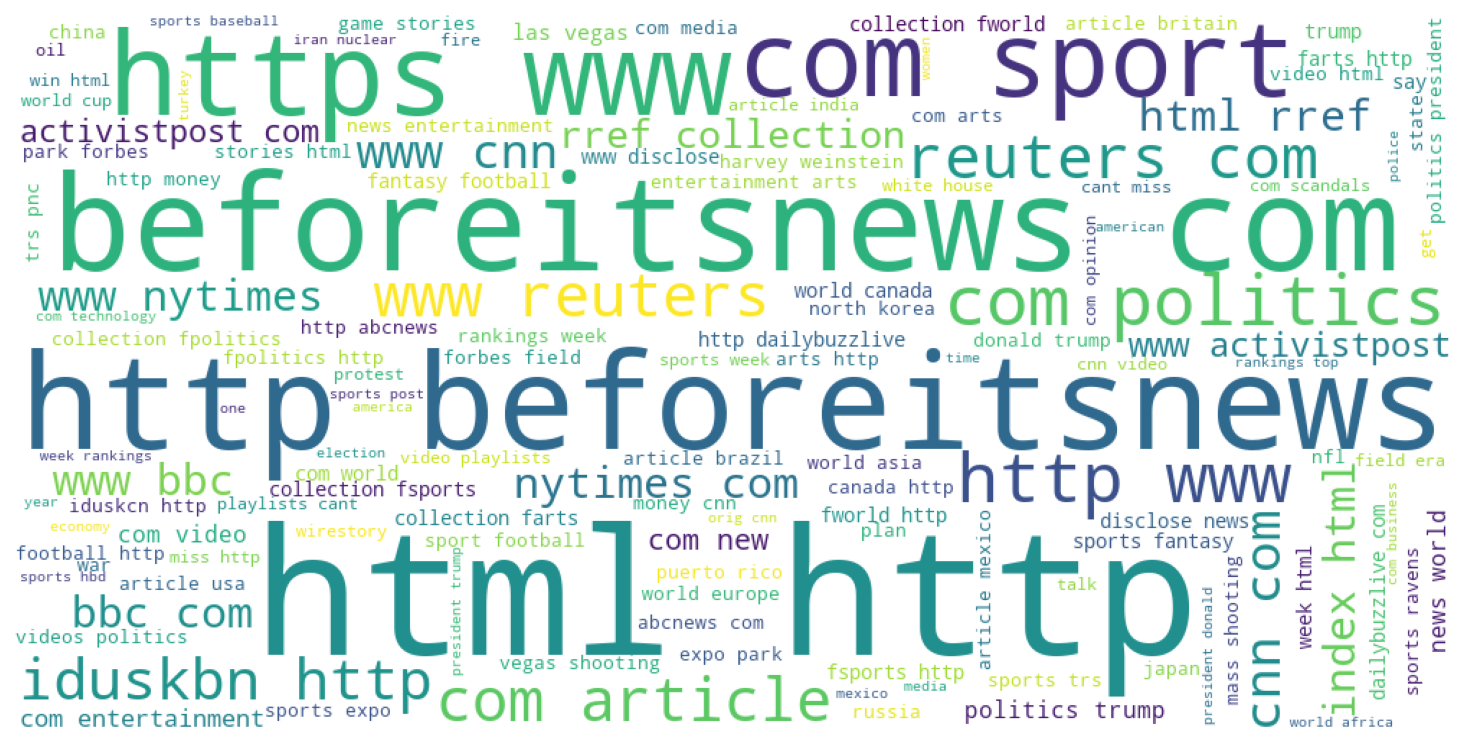

In [18]:
analyse_textual_attributes(df, textual_attributes)

## Pairwise analysis

Pairwise analysis of attributes (numerical attributes):

### Pair analysis

In [19]:
if numerical_attributes and len(numerical_attributes) > 1:
    sns.pairplot(df, vars=numerical_attributes, hue=label_column);

### Correlations

Correlation matrix:

In [20]:
if numerical_attributes and len(numerical_attributes) > 1:
    check_correlations(df, numerical_attributes)